# Simple Linear Regression

Linear regression is a supervised **Machine Learning (ML)** method where a dataset is modeled linearly. If there's only one predictor, the method is called as simple linear regression and a linear dependence is assumed between the response variable and the predictor.

Given a training dataset defined as:

$$
\mathrm{TD} = \{(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)\},
$$

the relationship is modeled as:

$$
y_i = \theta_0 + \theta_1 x_i,
$$

The goal is to find the set of parameters $\hat{\theta}_0, \hat{\theta}_1$ that best fit the dataset.

## `Python` Implementation (without libraries)

### Ordinary Least Squares

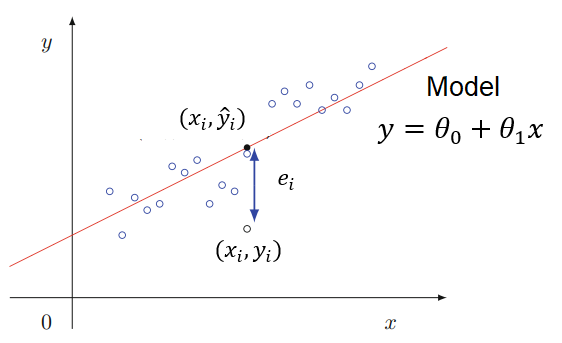

**Residual Sum of Squares (RSS)**

To estimate the parameters of the model that best fit our dataset, we introduce the **residual sum of squares (RSS)**. This measure is essential in the parameter fitting process using the ordinary least squares method. The RSS is defined as the sum of the squares of the residuals, where each residual represents the difference between the observed value and the value predicted by the model for each data point in the training set.

$$
\begin{split}
\text{RSS} :& = \sum_{i=1}^{N}e_i^2 \\
& = e_1^2 + e_2^2 + \cdots + e_N^2 \\
& = (y_1 - \theta_0 - \theta_1 x_1)^2 + (y_2 - \theta_0 - \theta_1 x_2)^2 + \cdots + (y_N - \theta_0 - \theta_1 x_N)^2 \\
& = \sum_{i=1}^{N} (y_i - \theta_0 - \theta_1 x_i)^2
\end{split}
$$

The best estimate will be the one that minimizes the sum of the squared residuals.

**Model fitting parameters**

To optimize the function $\text{RSS}(\theta_0, \theta_1)$, we must first identify its critical points. Then, by analyzing the Hessian matrix, we can classify them as maxima, minima, or saddle points.

**Critical Points**

$$
\nabla \text{RSS} (\theta_0, \theta_1) =
\bigg(\frac{\partial \text{RSS}}{\partial \theta_0}, \frac{\partial \text{RSS}}{\partial \theta_1}\bigg) = (0,0)
$$

$$
\begin{split}
& \frac{\partial \text{RSS}}{\partial \theta_0} = -2\sum_{i=1}^N(y_i - \theta_0 - \theta_1 x_i) = 0  \Rightarrow \sum_{i=1}^N y_i = N \,\hat{\theta}_0 + \hat{\theta}_1\sum_{i=1}^Nx_i \Rightarrow \hat{\theta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\theta}_1 \frac{\sum_{i=1}^N x_i}{N} = \boxed{\bar{y} - \hat{\theta}_1 \bar{x}}\\
& \frac{\partial \text{RSS}}{\partial \theta_1} = -2\sum_{i=1}^N(y_i - \theta_0 - \theta_1 x_i)x_i = 0 \Rightarrow \sum_{i=1}^N y_ix_i = \hat{\theta}_0 \sum_{i=1}^N x_i + \hat{\theta}_1\sum_{i=1}^Nx_i^2
\end{split}
$$

Therefore:

$$
\begin{split}
& \sum_{i=1}^N y_i x_i = \left( \bar{y} - \hat{\theta}_1 \bar{x} \right) \sum_{i=1}^N x_i + \hat{\theta}_1\sum_{i=1}^Nx_i^2 \\
& \sum_{i=1}^N y_ix_i  - \frac{\sum_{i=1}^N y_i\sum_{i=1}^N x_i}{N} = \hat{\theta}_1\left[ \sum_{i=1}^N x_i^2 - \frac{\left( \sum_{i=1}^N x_i \right)^2}{N} \right] \\
& \sum_{i=1}^N y_ix_i - \frac{\sum_{i=1}^N y_i}{N}\sum_{i=1}^N x_i + \sum_{i=1}^N y_i\frac{\sum_{i=1}^N x_i}{N} - \frac{N}{N}\sum_{i=1}^N y_i\frac{\sum_{i=1}^N x_i}{N} = \hat{\theta}_1\left[ \sum_{i=1}^N x_i^2 - N\left(\frac{ \sum_{i=1}^N x_i}{N} \right)^2\right] \\
& \sum_{i=1}^N y_ix_i - \bar{y}\sum_{i=1}^N x_i + \bar{x}\sum_{i=1}^N y_i - N\bar{y}\bar{x} = \hat{\theta}_1\left[ \sum_{i=1}^N x_i^2 - N\bar{x}^2 - N\bar{x}^2 + N\bar{x}^2\right] \\
& \sum_{i=1}^N \left(x_i - \bar{x}\right)\left( y_i - \bar{y} \right) = \hat{\theta}_1\sum_{i=1}^N\left( x_i - \bar{x} \right)^2
\end{split}
$$

Finally, we get the following relations:

$$
\Rightarrow
\left\{
\begin{array}{l}
\hat{\theta}_0 = \bar{y} - \hat{\theta}_1\bar{x} \\
\\
\hat{\theta}_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2} = \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}
\end{array} \right.
$$


**Hessian (H):**

$$
\begin{split}
& \frac{\partial^2 \text{RSS}}{\partial \theta_0^2} = -2\sum_{i=1}^N(-1) = 2N\\
& \frac{\partial^2 \text{RSS}}{\partial \theta_1^2} = -2\sum_{i=1}^N(-x_i)x_i = 2\sum_{i=1}^Nx_i^2 \\
& \frac{\partial^2 \text{RSS}}{\partial \theta_0\theta_1} = -2\sum_{i=1}^N(-x_i) = 2\sum_{i=1}^Nx_i
\end{split}
$$

If $\textrm{det} (H) > 0$ (always positive) $\Rightarrow$ $H$ is positive definite $\Rightarrow$ $(\hat{\theta}_0, \hat{\theta}_1)$ corresponds to a minimum.

$$
H(\hat{\theta}_0, \hat{\theta}_1) \equiv \frac{\partial^2\text{RSS}}{\partial\vec{\theta}^2} =
\begin{bmatrix}
2N & 2 \sum x_i \\
2 \sum x_i & 2 \sum x_i^2
\end{bmatrix}
$$

$$
\textrm{det} \bigg(\frac{\partial^2\text{RSS}}{\partial\vec{\theta}^2} \bigg) = 4N \sum_{i=1}^Nx_i^2 - 4\left( \sum_{i=1}^Nx_i \right)^2 = 4N \sum (x_i - \bar{x})^2 = 4N \mathrm{Var}(x) > 0
$$

so, $(\hat{\theta}_0, \hat{\theta}_1)$ correspond to a minimum, i.e.:

$$\therefore \min\limits_{ \{ \theta_0, \theta_1 \}} \text{RSS} = \text{RSS}(\hat{\theta}_0, \hat{\theta}_1)$$

In [9]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Parameters of fitting
# =====================

def min_sqr(x,y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    theta_1 = np.dot(x - x_bar, y - y_bar) / np.linalg.norm(x - x_bar)**2
    theta_0 = y_bar - theta_1 * x_bar
    return [theta_1, theta_0]

# Data generation
# ===============

N = 1000

# Generate a random sample of size N from a normal (Gaussian) distribution,
# centered at 2 with a standard deviation of 1
a = np.random.normal(loc=2, scale=1, size=N)

# Randomly generate points around the line distributed normally
b = np.random.randn(1)
x = np.random.randn(N)
y = a * x + b + np.random.randn(N)

# Estimation coefficients
theta_1, theta_0 = min_sqr(x, y)
theta_1, theta_0

(1.9653774478981367, -0.4011734803143678)

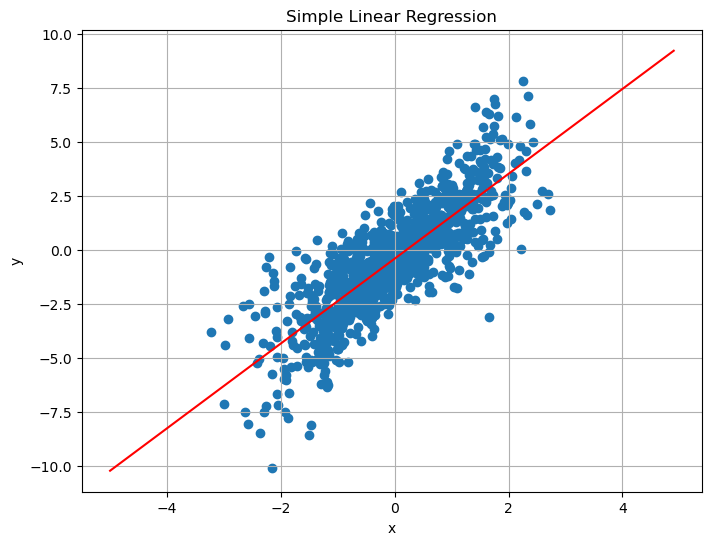

In [11]:
# Plot
# ====

x_seq = np.arange(-5, 5, 0.1)
y_pre = x_seq * theta_1 + theta_0

plt.figure(figsize=(8, 6))
plt.title("Simple Linear Regression")
plt.scatter(x, y) # Data
plt.plot(x_seq, y_pre, c="red") # Fitted line
plt.xlabel("x")
plt.ylabel("y")

plt.grid("True")
plt.show()

### Some Observations

It is important to distinguish between $e_i$, which represents the model residuals, and $\varepsilon_i$, which denotes the random errors. These concepts are fundamental for understanding the assumptions and quality of a regression model fit:

1. **Residuals ($e_i$) vs. Random Errors ($\varepsilon_i$)**:

   $$
   \boxed{
   e_i := \text{residuals} \neq \varepsilon_i := \text{random errors}
   }
   $$

   - **Residuals ($e_i$)**: The differences between observed values and the values predicted by the model. They quantify the unexplained variability after fitting the model.
   - **Random Errors ($\varepsilon_i$)**: The inherent variability or randomness in the data, assumed to be independent and identically distributed with mean zero. These errors represent noise not captured by the model.

2. **Normal Distribution of Residuals**:

   $$
   \boxed{
   e_i \sim N(0, \sigma^2)
   }
   $$

   - Residuals ($e_i$) are typically assumed to follow a normal distribution with mean zero and constant variance $\sigma^2$, i.e., $e_i \sim N(0, \sigma^2)$.
   - The notation $N(0, \sigma^2)$ indicates a normal (Gaussian) distribution with mean ($\mu$) equal to zero and variance ($\sigma^2$).

3. **Homoscedasticity**:

   $$
   \boxed{
   \text{Var}(e_i) = \sigma^2 \quad (\text{constant})
   }
   $$

   - Homoscedasticity occurs when the variance of the residuals ($e_i$) is constant across all levels of the independent variables.
   - This assumption ensures that the model's predictions are equally precise for all observations.

4. **Heteroscedasticity**:

   $$
   \boxed{
   \text{Var}(e_i) = \sigma_i^2 \quad (\text{not constant})
   }
   $$

   - Heteroscedasticity arises when the variance of the residuals ($e_i$) is not constant across observations, i.e., $\text{Var}(e_i) = \sigma_i^2$.
   - This violates the assumption of constant variance in linear regression, potentially leading to biased parameter estimates and unreliable inferences.

Understanding these distinctions is crucial for properly diagnosing and interpreting regression models. In particular, identifying heteroscedasticity is important, as it can impact the accuracy of statistical tests and confidence intervals.

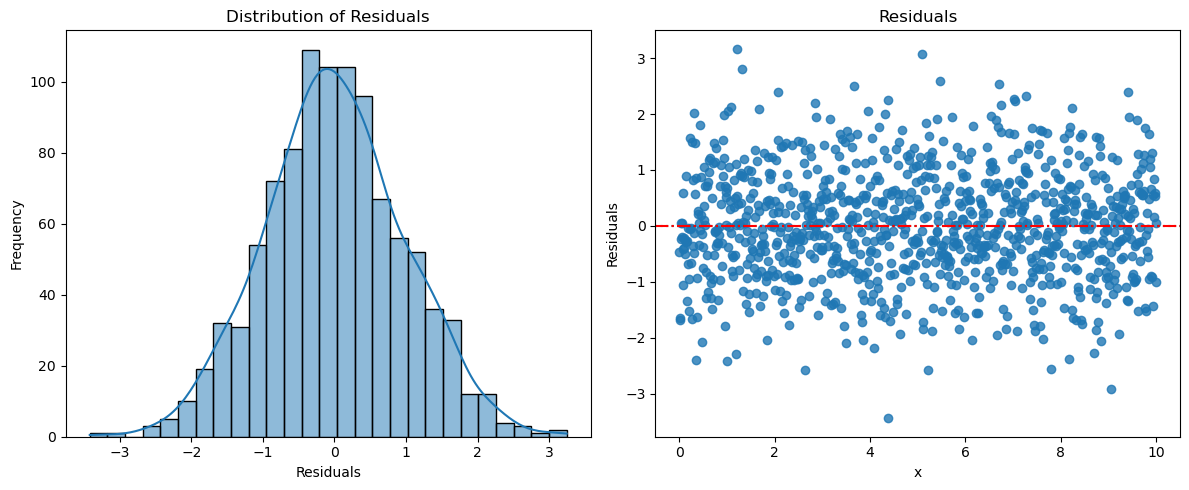

In [42]:
# Generate example data
x = np.linspace(0, 10, 1000)
theta_0 = 1
theta_1 = 2
y = theta_0 + theta_1 * x + np.random.normal(0, 1, 1000)  # Linear model with normal errors

# Calculate residuals
residuals = y - (theta_0 + theta_1 * x)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of residuals
sns.histplot(residuals, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Residuals')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

# Plot of residuals
sns.residplot(x = x, y = residuals)
axs[1].axhline(y=0, color='red', linestyle='-.')
axs[1].set_title('Residuals')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

### Confidence intervals

Confidence intervals are crucial in statistical analysis as they provide a range of values within which we can be confident that the true population parameter lies. In linear regression analysis, confidence intervals are utilized to estimate the precision of the coefficients and predictions derived from the model.

**Residual Standard Error**

In order to construct a confidence interval it is necessary to know the dispersion of the random term $\sigma$. However, in general $\sigma$ is not known, but can be estimated from the data. This estimate of $\sigma$ is what is known as the **Residual Standard Error** or $\text{RSE}$ ($\hat{\sigma}$). $\text{RSE}$ is a fundamental measure in regression analysis and quantifies the dispersion of the observed values around the regression line and since said dispersion is given by $\text{RSS}$, under the assumptions of homoscedasticity (constant variance of errors) and independence of errors (uncorrelated), the unbiased estimate of the variance is obtained by dividing the sum of the squared residuals by $(n - M - 1)$, where $N$ is the number of observations and $M$ is the number of predictors (for the case of simple linear regression, there would be two degrees of freedom):

$$
\text{RSE} := \sqrt{\frac{\text{RSS}}{N - M - 1}} = \hat{\sigma}
$$

**Confidence Interval for Regression Coefficients**

To construct a confidence interval, it is necessary to estimate the population mean $\mu$ of the response variable $Y$. To do this, we must first calculate the sample mean $\bar{y}$:

$$
\hat{\mu} = \bar{y} = \frac{1}{N}\sum _{i=1}^Ny_i
$$

Now, the standard error of the mean $\text{SE}(\hat{\mu})$ is determined by dividing $\sigma^2$ by the sample size $N$, given that:

$$
\text{Var}(\hat{\mu}) = \text{Var}(\bar{y}) = \frac{1}{N^2}\text{Var}(\sum _{i=1} ^N y_i)
$$

Because $y_i = \theta_0 + \theta_1 x_i + \varepsilon_i$ according to the linear model, we observe that $y_i$ are independent, so:

$$
\text{Var}(\bar{y}) = \frac{1}{N^2}\sum _{i=1}^N \text{Var}(y_i) = \frac{1}{N^2 }\sum _{i=1}^N \text{Var}(\varepsilon_i)
$$

Assuming homoscedasticity, we know that $\text{Var}(\varepsilon_i) = \sigma^2 = \text{constant}$, and we obtain:

$$
\text{Var}(\bar{y}) = \frac{1}{N^2}\sum _{i=1}^N\sigma^2 = \frac{1}{N^2}N\sigma ^2 = \frac{\sigma^2}{N} = \text{SE}(\hat{\mu})^2
$$

Based on this, we have the possibility of constructing a confidence interval around the sample mean. Typically, a **95%** confidence level is chosen, resulting in an interval of $\hat{\mu} \pm 2 \times \text{SE}(\hat{\mu})$. Therefore:

$$
[\hat{\mu} - 2 \cdot \text{SE}(\hat{\mu}), \hat{\mu} + 2 \cdot \text{SE}(\hat{\mu})]
$$

For the regression coefficients $\hat{\theta}_0$ and $\hat{\theta}_1$, confidence intervals are calculated to evaluate the uncertainty when estimating these parameters. To do this, the standard errors of both parameters must be calculated, which is what is done in what follows. If we define the quantity:

$$
k_i = \frac{x_i - \bar{x}}{\sum(x_i - \bar{x})^2}
$$
we can rewrite the relationship obtained by least squares for $\hat{\theta}_1$:

$$
\begin{split}
\hat{\theta}_1 &= \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2} \\
& = \sum k_iy_i - \bar{y}\sum k_i \\
& = \sum k_iy_i - \bar{y}\sum k_i - \text{constant}
\end{split}
$$

If we apply properties of the variance we have that:

$$
\begin{split}
\text{Var}(\hat{\theta}_1) & = \text{Var}\left(\sum k_iy_i\right) - \text{Var}(\text{constant}) - 2 \, \text{Cov}\left(\sum k_iy_i,\text{constant}\right)\\
& = \sum k_i^2 \, \text{Var}(y_i) \\
& = \sigma^2\sum k_i \\
& = \sigma^2\sum\frac{(x_i - \bar{x})^2}{\left[\sum(x_i - \bar{x})^2\right]^2} \\
& = \sigma^2 \frac{\sum(x_i - \bar{x})^2}{\left[\sum(x_i - \bar{x})^2\right]^2} \\
& = \frac{\sigma^2 }{\sum (x_i - \bar{x})^2} \\
\end{split}
$$

On the other hand, from the relationship obtained for the parameter $\hat{\theta}_0$, we have that:

$$
\hat{\theta}_0 = \bar{y} - \hat{\theta}_1\bar{x}
$$

Again, applying variance properties:

$$
\begin{split}
\text{Var}(\hat{\theta}_0) & = \text{Var}(\bar{y}) - \bar{x}^2\text{Var} (\hat{\theta}_1) \\
& = \frac{\sigma^2}{N} - \bar{x}^2\frac{\sigma^2 }{\sum (x_i - \bar{x})^2} \\
& = \sigma^2 \big[ \frac{1}{N} + \frac{\bar{x}^2}{\sum (x_i - \bar{x })^2} \big] \\
\end{split}
$$

Therefore, for $\hat{\theta}_0$, which represents the intercept, its standard error is computed using the variance of the residuals and the spread of the predictor variable $x$. Conversely, $\hat{\theta}_1$, the slope coefficient, has a standard error influenced solely by the spread of the predictor variable. Larger standard errors indicate greater uncertainty in estimating the coefficients. A **95%** confidence interval for each coefficient is constructed by adding and subtracting twice their respective standard errors from the estimated coefficient value. The interpretation of these intervals is that with **95%** confidence, the true value of the coefficient lies within the interval. Additionally, examining the variability of standard errors provides insights into the sensitivity of the coefficients to changes in the data. Specifically, $\text{SE}(\hat{\theta}_1)$ decreases as the spread of $x$ increases, meaning more reliable estimates of the slope when the predictor variable is more dispersed. Furthermore, in situations where the mean of $x$ is zero ($\hat{\theta}_0 = \bar{y}$), the standard error of $\hat{\theta}_0$ equates to the standard error of $\text{SE}(\hat{\mu})$. 

Summarizing:

$$
\left\{
\begin{array}{l}
\text{SE}(\hat{\theta}_0)^2 = \sigma^2 \big[ \frac{1}{N} + \frac{\bar{x}^2}{\sum (x_i - \bar{x })^2} \big] \\
\\
\text{SE}(\hat{\theta}_1)^2 = \frac{\sigma^2}{\sum (x_i - \bar{x})^2}
\end{array} \right.
$$

with **95%** confidence that the parameters are twice the standard error of the respective parameter.

* $\text{SE}(\hat{\theta}_1)$ is smaller when $x_i$ is more spread out because we have more freedom to estimate a slope in this case.
* $\bar{x} = 0 \, \big(\hat{\theta}_0 = \bar{y}\big) \Rightarrow \text{SE}(\hat{\theta}_0) = \text{SE}(\hat{\mu })$

In [19]:
# Mean value of RSS
mean_rss = np.mean(residuals ** 2)
print("Mean value of RSS:", mean_rss)

# Var(RSS)
n = len(residuals)
p = 2  # For simple linear regression
var_rss = np.sum(residuals ** 2) / (n - p - 1)
print("Variance of RSS:", var_rss)

# Estimator of sigma (RSE)
RSE = np.sqrt(var_rss)
print("RSE:", RSE)

Mean value of RSS: 1.0131664824702227
Variance of RSS: 1.016215127853784
RSE: 1.0080749614258773


In [20]:
# Calculations
n = len(residuals)
p = 2  # for simple linear regression
x_bar = np.mean(x)

# Estimator for mu (y_bar)
mu_hat = np.mean(y)
se_mu = np.sqrt(var_rss / n)

# Estimator for theta_0
se_theta_0 = np.sqrt(var_rss * (1/n + x_bar**2 / np.sum((x - x_bar)**2)))

# Estimator for theta_1
se_theta_1 = np.sqrt(var_rss / np.sum((x - x_bar)**2))

# 95% Confidence Intervals
ci_mu = (mu_hat - 2.0 * se_mu, mu_hat + 2.0 * se_mu)
ci_theta_0 = (theta_0 - 2.0 * se_theta_0, theta_0 + 2.0 * se_theta_0)
ci_theta_1 = (theta_1 - 2.0 * se_theta_1, theta_1 + 2.0 * se_theta_1)

print("Estimation of mu = ", mu_hat)
print("Standard error se = ", se_mu)
print("Confidence interval for mu = ", ci_mu)
print('------------------------------')
print("Estimation of theta_0 = ", theta_0)
print("Standard error se_theta_0 = ", se_theta_0)
print("Confidence interval for theta_0 = ", ci_theta_0)
print('------------------------------')
print("Estimation of theta_1 = ", theta_1)
print("Standard error se_theta_1 = ", se_theta_1)
print("Confidence interval for theta_1 = ", ci_theta_1)

Estimation of mu =  11.004734537801466
Standard error se =  0.031878129302921526
Confidence interval for mu =  (10.940978279195624, 11.068490796407309)
------------------------------
Estimation of theta_0 =  1
Standard error se_theta_0 =  0.06370847127225374
Confidence interval for theta_0 =  (0.8725830574554925, 1.1274169425445075)
------------------------------
Estimation of theta_1 =  2
Standard error se_theta_1 =  0.011031870528598125
Confidence interval for theta_1 =  (1.9779362589428038, 2.022063741057196)


### Student's t-test

The standard error (SE) can be used to perform hypothesis tests to determine whether there is a significant relationship between the predictor variable $X$ and the response variable $Y$.

$$
\left\{
\begin{array}{l}
H_0: \theta_1 = 0 \\
\\
H_1: \theta_1 \neq 0
\end{array} \right.
$$

* If $\theta_1 = 0$, it implies that $Y = \theta_0 + \varepsilon$, and therefore $X$ does not influence $Y$.

To assess the significance of the relationship, we use the t-statistic, given by:

$$
t = \frac{\hat{\theta}_1 - 0}{\text{SE}(\hat{\theta}_1)}
$$

The t-test is utilized here to evaluate whether the slope coefficient $\theta_1$ significantly differs from zero. The rationale behind using the t-test is that it allows us to determine if the estimated coefficient $\hat{\theta}_1$ is statistically different from zero, indicating whether there is a significant linear relationship between the predictor variable $X$ and the response variable $Y$.

We then analyze the **p-value**, which indicates the probability of observing a t-value as extreme as the one computed, given that the null hypothesis is true. In this context:

- If the **p-value** is less than the chosen significance level (usually $\alpha = 0.05$), we reject the null hypothesis $H_0$ in favor of the alternative hypothesis $H_1$, suggesting that there is evidence of a linear relationship between $X$ and $Y$.
- If the **p-value** is greater than or equal to the significance level ($\alpha = 0.05$), we do not have enough evidence to reject the null hypothesis, indicating that there is insufficient evidence to conclude that $X$ influences $Y$.

In [21]:
from scipy.stats import t

# Calculations
n = len(residuals)
p = 2  # For simple linear regression
x_bar = np.mean(x)

# Estimator for theta_1
SE_theta_1 = np.sqrt(var_rss / np.sum((x - x_bar)**2))

# t-test for theta_1
t_stat_theta_1 = theta_1 / SE_theta_1

# Degrees of freedom
degrees_freedom = n - p - 1

# Calculating the p-value using the Student's t-distribution
p_value_theta_1 = 2 * (1 - t.cdf(np.abs(t_stat_theta_1), degrees_freedom))

print("t-statistic for theta_1:", t_stat_theta_1)
print("p-value for theta_1:", p_value_theta_1)

# Checking significance at the 0.05 level
alpha = 0.05
if p_value_theta_1 < alpha:
    print("The variable x has a significant relationship with y.")
else:
    print("The variable x does not have a significant relationship with y.")

t-statistic for theta_1: 181.2929180790658
p-value for theta_1: 0.0
The variable x has a significant relationship with y.


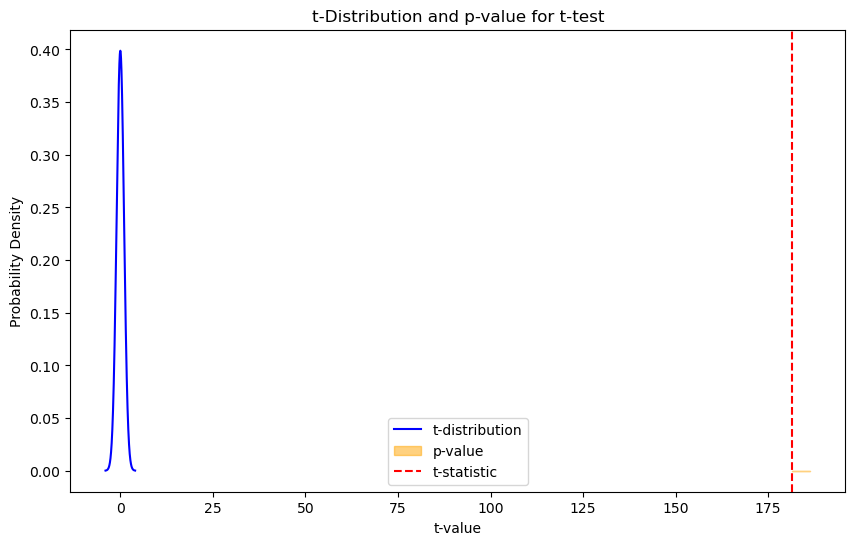

In [22]:
# Plot of the t-statistic with shaded area
plt.figure(figsize=(10, 6))
x_vals = np.linspace(-4, 4, 400)
y_vals = t.pdf(x_vals, degrees_freedom)
plt.plot(x_vals, y_vals, 'b-', label='t-distribution')

# Shaded area for the p-value
x_fill = np.linspace(t_stat_theta_1, t_stat_theta_1 + 5.)
y_fill = t.pdf(x_fill, degrees_freedom)
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.5, label='p-value')

# Vertical line at the t-statistic value
plt.axvline(x=t_stat_theta_1, color='r', linestyle='--', label='t-statistic')

plt.title("t-Distribution and p-value for t-test")
plt.xlabel("t-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

### Analysis of Variance (ANOVA) to assessing the linear regression model

**Analysis of Variance (ANOVA)** is a statistical technique used to compare means between two or more groups. It assesses whether there are statistically significant differences among the means of the groups by examining the variability within each group compared to the variability between groups.

In the context of regression analysis, **ANOVA** is often used to evaluate the overall significance of the regression model. It helps to determine whether the explanatory variables collectively have a significant effect on the response variable.

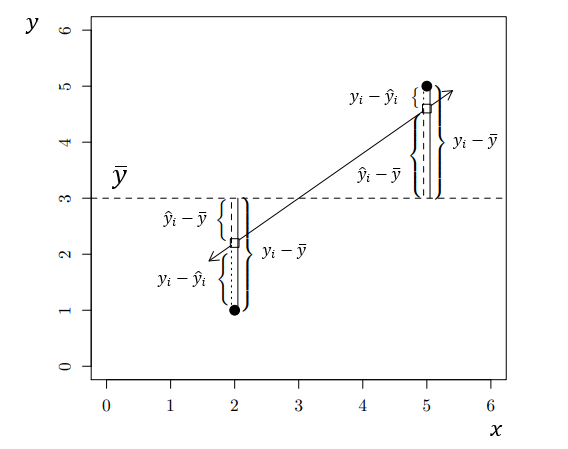

To implement **ANOVA** in the context of simple linear regression we observe from the figure above that we can establish the following relationship :

$$y_i - \bar{y} = \hat{y}_i - \bar{y} + y_i - \hat{y}_i$$

$$ \Rightarrow \sum_{i=1}^N (y_i - \bar{y})^2 = \sum_{i=1}^N (\hat{y}_i - \bar{y})^2 + \sum_{i=1}^N (y_i - \hat{y}_i)^2$$

To prove the last relationship, we observe that

$$
2 \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right) \left( y_i - \hat{y}_i \right) = 2 \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right) e_i = 2 \sum_{i=1}^N \hat{y}_ie_i - 2 \bar{y}\sum_{i=1}^N e_i
$$

But:

$$
\sum_{i=1}^N e_i = \sum_{i=1}^N \left( y_i - \hat{\theta}_0 - \hat{\theta}_1x_i \right) = \sum_{i=1}^N y_i - N\hat{\theta}_0 - \hat{\theta}_1\sum_{i=1}^N x_i = 0
$$

from the relationship obtained by imposing $\frac{\partial \text{RSS}}{\partial \theta_0} = 0$. In the same way, from the relationship obtained by imposing $\frac{\partial \text{RSS}}{\partial \theta_1} = 0$:

$$
\begin{split}
& \sum_{i=1}^N y_ix_i - \hat{\theta}_0 \sum_{i=1}^N x_i + \hat{\theta}_1\sum_{i=1}^N x_i^2 = 0 \\
& \sum_{i=1}^N x_i\left( y_i - \hat{\theta}_0 - \hat{\theta}_1 x_i\right) = 0 \\
& \sum_{i=1}^N x_i\left( y_i - \hat{y}_i \right) = 0 \\
& \sum_{i=1}^N x_ie_i = 0 
\end{split}
$$

Therefore:

$$
\sum_{i=1}^N \hat{y}_ie_i = \sum_{i=1}^N \left(\hat{\theta}_0 + \hat{\theta}_1 x_i\right) e_i = \hat{\theta}_0\sum_{i=1}^N e_i + \hat{\theta}_1  \sum_{i=1}^N x_ie_i = 0
$$

And substituting these results we obtain:

$$
2 \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right) \left( y_i - \hat{y}_i \right) = 0
$$

And finally we get

$$
\begin{split}
\sum_{i=1}^N (y_i - \bar{y})^2 & = \sum_{i=1}^N \left[\left(\hat{y}_i - \bar{y}\right) + \left(y_i - \hat{y}_i\right) \right]^2\\
& = \sum_{i=1}^N (\hat{y}_i - \bar{y})^2 + \sum_{i=1}^N (y_i - \hat{y}_i)^2 + 2 \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right) \left( y_i - \hat{y}_i \right) \\
& = \sum_{i=1}^N (\hat{y}_i - \bar{y})^2 + \sum_{i=1}^N (y_i - \hat{y}_i)^2
\end{split}
$$

Next, we introduce the following definitions:

- **TSS** is **Total Sum of Squares** represents the total variability in the observations of the dependent variable

$$
\text{TSS} := \sum_{i=1}^n (y_i - \bar{y})^2
$$

- **MSS** is **Model Sum of Squares** represents the variability explained by the regression model

$$
\text{MSS} := \sum_{i=1}^n (\hat{y}_i - \bar{y})^2
$$

- **RSS** is **Residual Sum of Squares** represents the variability not explained by the regression model 

$$
\text{RSS} := \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

Therefore

$$
\text{TSS} = \text{MSS} + \text{RSS}
$$

And, when a sum of squares is divided by its associated degrees of freedom, the result is called a mean square:

- **Mean of Total Squares** (**MTS**): $$\frac{\text{TSS}}{1} = \text{MTS}$$ Only one degree of freedom is needed to determine the total variability.

- **Model Mean Squares** (**MMS**): $$\frac{\text{MSS}}{1} = \text{MMS}$$ Only one degree of freedom is needed to determine the variability explained by the model.

- **Mean of Squares of the Residuals** (**MSR**): $$\frac{\text{RSS}}{N-2} = \text{MSR}$$ Two degrees of freedom are needed to determine the variability not explained by the model.

The mean squares are not additive:

$$\text{MTS} \neq \text{MMS} + \text{MSR}$$

Based on this, we can use a Fisher's F-test to assess the significance of the model, as the F-statistic compares the variability explained by the model with the unexplained variability. That is:

$$F = \frac{\text{MMS}}{\text{MSR}}$$

If the model is significant, it is expected that F is greater than 1. Subsequently, the $\mathrm{p-value}$ can be analyzed based on a predetermined significance level (usually $\alpha = 0.05$).

In [23]:
# ANOVA (Analysis of Variance)
# ============================

# Model Sum of Squares (MSS)
mss = np.sum((theta_1 * x + theta_0 - np.mean(y))**2)

# Residual Sum of Squares (RSS)
rss = np.sum(residuals**2)

# Total Sum of Squares (TSS)
tss = mss + rss

# Degrees of Freedom
p = 2  # for simple linear regression
df_model = 1  # Number of regression coefficients (theta_0 and theta_1)
df_residual = n - p - 1
df_total = 1

# Model Mean Square (MMS)
mms = mss / df_model

# Mean Square of Residuals (MSR)
msr = rss / df_residual

# F-value
f_value = mms / msr

# Print ANOVA results and R-squared
print("Model Sum of Squares (MSS):", mss)
print("Residual Sum of Squares (RSS):", rss)
print("Total Sum of Squares (TSS):", tss)
print("Model Mean Square (MMS):", mms)
print("Mean Square of Residuals (MSR):", msr)
print("F-value:", f_value)

Model Sum of Squares (MSS): 33400.08914924826
Residual Sum of Squares (RSS): 1013.1664824702227
Total Sum of Squares (TSS): 34413.255631718486
Model Mean Square (MMS): 33400.08914924826
Mean Square of Residuals (MSR): 1.016215127853784
F-value: 32867.14420379497


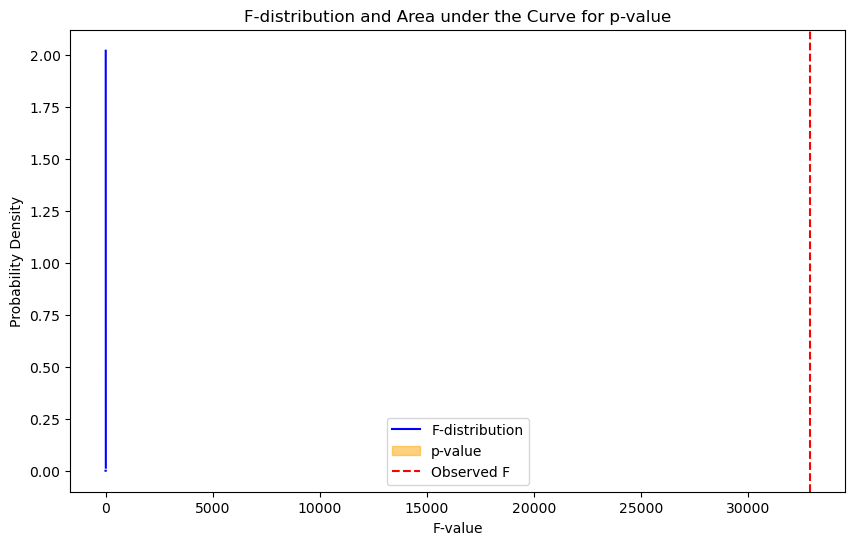

Observed F-value: 32867.14420379497
Observed p-value: 1.1102230246251565e-16


In [24]:
from scipy.stats import f

# Degrees of freedom for the numerator and denominator
df_num = df_model
df_den = df_residual

# Values for the x-axis
x_vals = np.linspace(-10, 5, 400)

# Probability density function of the F-distribution
y_vals = f.pdf(x_vals, df_num, df_den)

# Observed F-value
f_observed = f_value

# Observed p-value
p_value_observed = 1 - f.cdf(f_observed, df_num, df_den)

# Create the figure and axes
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', label='F-distribution')

# Shaded area for the p-value
x_fill = np.linspace(f_observed, f_observed + 20.)
y_fill = f.pdf(x_fill, df_num, df_den)
plt.fill_between(x_fill, y_fill, color='orange', alpha=0.5, label='p-value')

# Vertical line at the observed F-value
plt.axvline(x=f_observed, color='r', linestyle='--', label='Observed F')

plt.title("F-distribution and Area under the Curve for p-value")
plt.xlabel("F-value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

print("Observed F-value:", f_observed)
print("Observed p-value:", p_value_observed)

### $R^2$ Statistic

Another measure used in regression to evaluate how much variability in the dependent variable ($Y$) is explained by the regression model compared to the total variability present in the data is the coefficient of determination $R^2$. In essence, $R^2$ provides a measure of the goodness of fit of the model to the observed data.

$$R^2 = \frac{MSS}{TSS} = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

- If $R^2 = 1$: It means that the model explains all the variability in the observed data. Each point falls exactly on the regression line. This is very rare in practice and could indicate overfitting of the model.

- If $R^2 = 0$: Indicates that the model is not explaining any variability in the observed data.

- If $0 < R^2 < 1$ Indicates the proportion of total variability that is explained by the model.

In a simple linear regression

$$R^2 = r^2$$

where $r$ is the Pearson correlation coefficient.

In [26]:
# Analysis of Coefficient of Determination (R-squared)
# ====================================================

# Calculate R-squared manually
y_mean = np.mean(y)
tss = np.sum((y - y_mean)**2)
r_squared = mss / tss

print("Coefficient of determination (R-squared) calculated manually:", r_squared)

Coefficient of determination (R-squared) calculated manually: 0.9630775753965141


## `Python` Implementation (using libraries)

`Python` provides a collection of libraries that streamline the implementation of linear regression, making the code more concise and straightforward.

In [37]:
# Importing ML libraries
import statsmodels.api as sm
import scipy.stats as stats

In [38]:
# Data generation
N = 1000
theta_1 = np.random.normal(loc=2, scale=1, size=N)
theta_0 = np.random.randn(1)
x = np.random.randn(N)
y = theta_1 * x + theta_0 + np.random.randn(N)

# Create a design matrix with a column of ones for the constant term
X = sm.add_constant(x)

# Create the linear model using OLS (Ordinary Least Squares)
model = sm.OLS(y, X).fit()

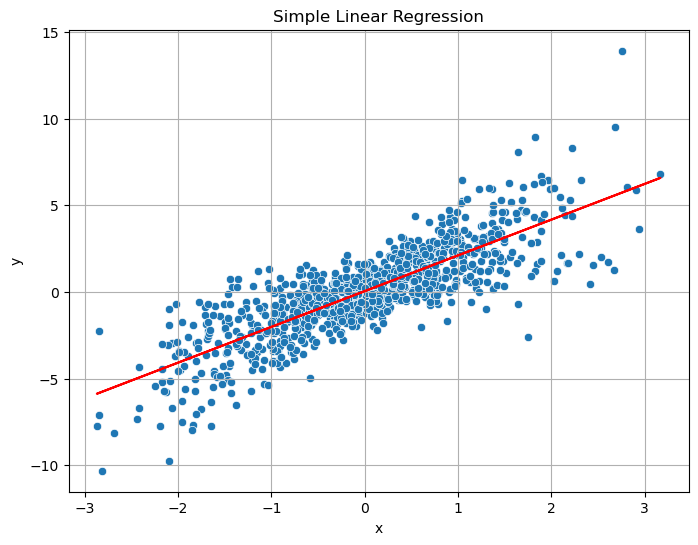

In [39]:
# Estimated coefficients
theta_0 = model.params[0]
theta_1 = model.params[1]
y_pred = x * theta_1 + theta_0

# Plot
plt.figure(figsize=(8, 6))
plt.title("Simple Linear Regression")
sns.scatterplot(x=x, y=y)
plt.plot(x, y_pred, c="red")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

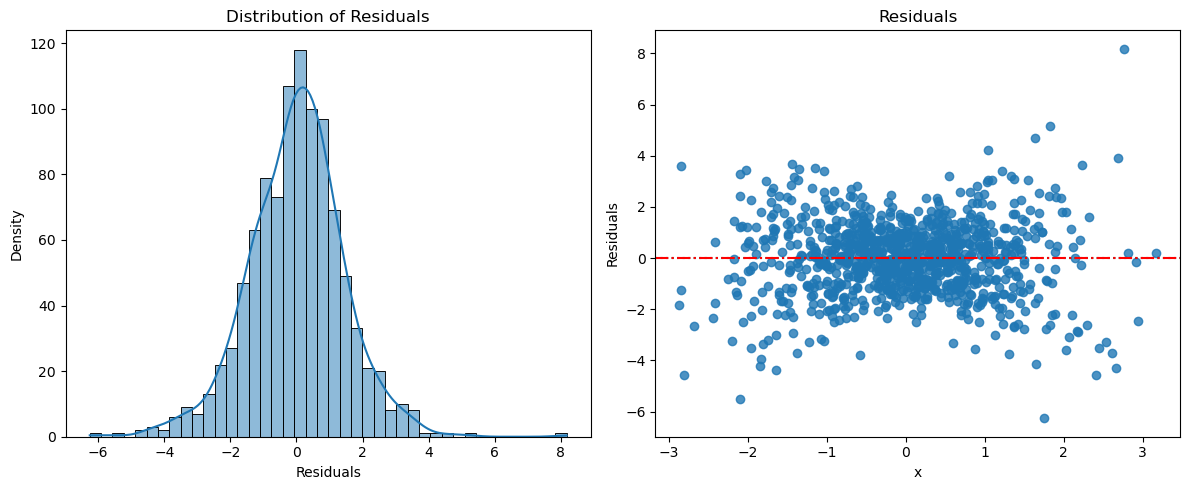

In [41]:
# Calculate residuals
residuals = y - y_pred

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of residuals
sns.histplot(residuals, kde=True, ax=axs[0])
axs[0].set_title('Distribution of Residuals')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

# Plot of residuals
sns.residplot(x = x, y = residuals)
axs[1].axhline(y=0, color='red', linestyle='-.')
axs[1].set_title('Residuals')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

In [43]:
# Model Summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     2094.
Date:                Tue, 31 Dec 2024   Prob (F-statistic):          2.86e-247
Time:                        14:25:49   Log-Likelihood:                -1784.7
No. Observations:                1000   AIC:                             3573.
Df Residuals:                     998   BIC:                             3583.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0451      0.046      0.989      0.3